In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
# Save the input and target variables
#print(diabetes_dataset.keys())

data = diabetes_dataset['data']
targets = diabetes_dataset['target']


In [5]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
        
    ])
    
    return model

model = get_model()

In [8]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mae', metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, 
                   validation_split = 0.15, batch_size = 64, verbose=False)

In [11]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6911 - mae: 0.6617


[0.6617299477259319, 0.66172993]

#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

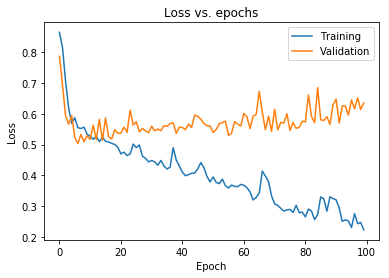

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [17]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mae', metrics=['mae'])

In [18]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, 
                    validation_split = 0.15, batch_size = 64, verbose=False )

In [19]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2 )


45/1 - 0s - loss: 0.5646 - mae: 0.5141


[0.5204528490702311, 0.5141243]

#### Plot the learning curves

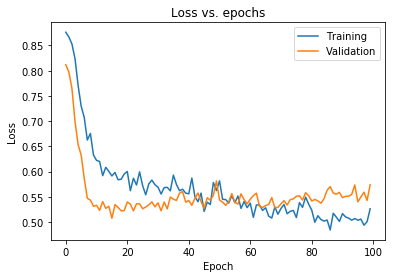

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [21]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finishing epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training:")

In [22]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)


In [23]:
# Compile the model

model.compile(optimizer='adam', loss='mae')

#### Train the model with the callback

In [24]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False,
         callbacks=[TrainingCallback()])

Starting training....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finishing epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finishing epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finishing epoch 2
Finished training:


In [25]:
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing....")
        
     
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
          
    def on_test_end(self, logs=None):
        print("Finished testing:")

In [26]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing:


0.7672146174642774

In [27]:
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction....")
                  
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished Prediction:")

In [28]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction....
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished Prediction:


array([[-0.11265305],
       [-0.146658  ],
       [-0.15564255],
       [-0.12342057],
       [-0.1911146 ],
       [-0.1758881 ],
       [-0.1576942 ],
       [-0.14800957],
       [-0.10231273],
       [-0.15374856],
       [-0.1499573 ],
       [-0.17959106],
       [-0.12447375],
       [-0.14354832],
       [-0.18389666],
       [-0.15222096],
       [-0.1880995 ],
       [-0.16224736],
       [-0.13073888],
       [-0.15136784],
       [-0.18508428],
       [-0.14447927],
       [-0.11374766],
       [-0.13150918],
       [-0.11294891],
       [-0.12143293],
       [-0.1610251 ],
       [-0.15676926],
       [-0.13206173],
       [-0.14666861],
       [-0.15285064],
       [-0.16447629],
       [-0.15387772],
       [-0.15275872],
       [-0.16931595],
       [-0.18437016],
       [-0.17505851],
       [-0.11773841],
       [-0.1448814 ],
       [-0.18737099],
       [-0.16672148],
       [-0.16363029],
       [-0.1777199 ],
       [-0.18669477],
       [-0.13806239]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [40]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mae')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100,
                                       validation_split=0.15, batch_size=64,verbose=False,
                                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [35]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.5805


0.5646954364246792

In [41]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam', loss='mae')
reg_history = regularised_model.fit(train_data, train_targets, epochs=100,
                                       validation_split=0.15, batch_size=64,verbose=False,
                                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [37]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.6232


0.6316825972663032

#### Plot the learning curves

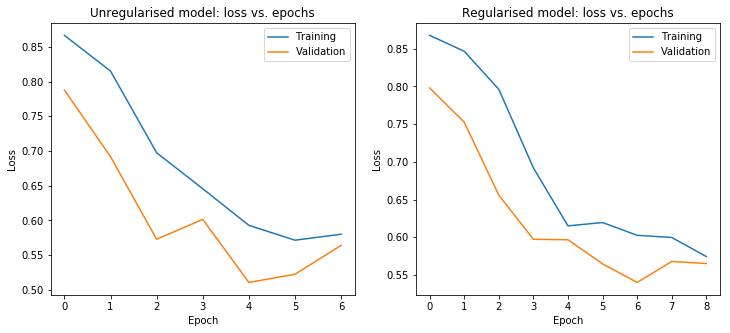

In [42]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()